In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/nryotaro/.pyenv/versions/anaconda3-4.3.1/envs/ml/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :],  y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',  alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

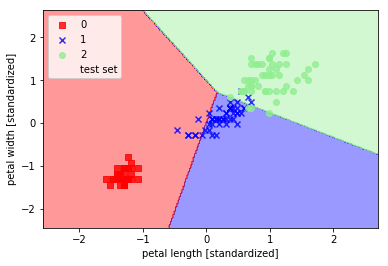

In [3]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

import numpy as np
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [4]:
a = np.array([1,3,4,5])

In [5]:
a = a.reshape((2,2))

In [6]:
a

array([[1, 3],
       [4, 5]])

In [7]:
a[np.array([False, True]),0]

array([4])

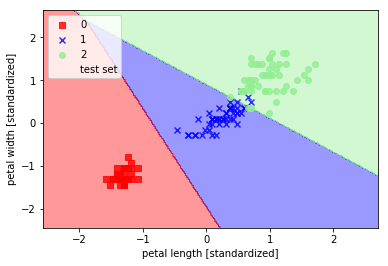

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [9]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4]])

[[-9.38725178 -8.62196104]
 [ 2.54760621 -2.34616582]
 [ 9.8260878   6.51345035]]
(5, 2)


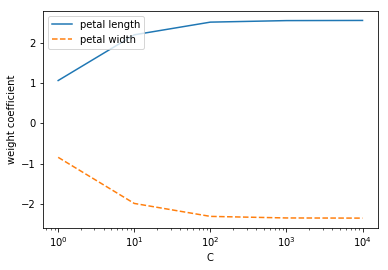

In [10]:
weights, params = [], []
for c in np.arange(0, 5): # negative values are not allowed
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

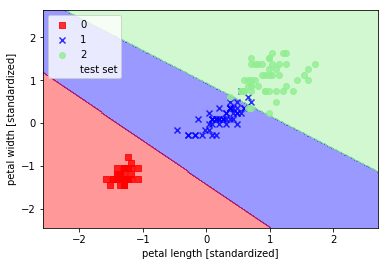

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [13]:
np.random.seed(0)

[-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1
  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1
  1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1
  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1
 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1]


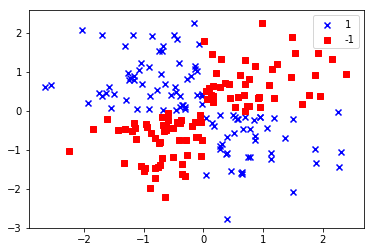

In [18]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
print(y_xor)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [ ]:
np.logical